# Running Inference
This notebook will contain demonstrations on how to run inference using the SRGAN network. 

In [2]:
import os
import sys
sys.path.append('libs/')
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

from libs.srgan import SRGAN
from libs.util import DataLoader

Using TensorFlow backend.


# 1. Load model & Weights

In [7]:
# Instantiate the model
gan = SRGAN(upscaling_factor=2)
gan.generator.summary()

# Load weights - this assumes you've already trained the network!
# Replace filename with the location of your trained weights
gan.load_weights('./model/SRGAN_places365_generator_2X.h5')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-gen (InputLayer)          (None, None, None, 3 0                                            
__________________________________________________________________________________________________
Conv2d-pre (Conv2D)             (None, None, None, 6 15616       Input-gen[0][0]                  
__________________________________________________________________________________________________
PReLU-pre (PReLU)               (None, None, None, 6 64          Conv2d-pre[0][0]                 
__________________________________________________________________________________________________
conv2d_153 (Conv2D)             (None, None, None, 6 36928       PReLU-pre[0][0]                  
__________________________________________________________________________________________________
batch_norm

## 2.2. Inference on images from internet

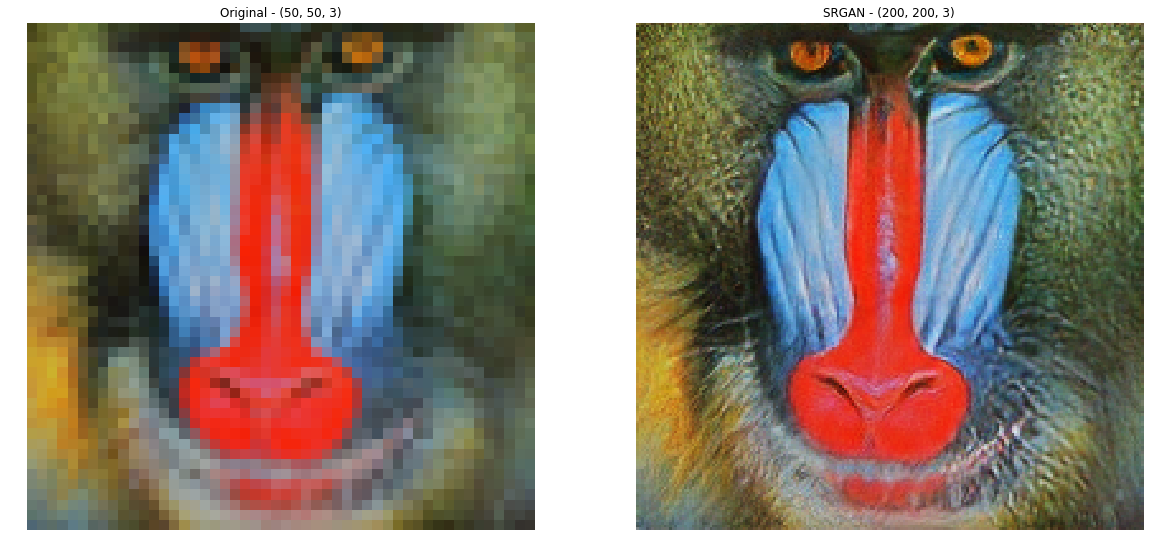

In [14]:
# Load image
img_lr = DataLoader.load_img("./images/baboon-lowRes.png").astype(np.uint8)

# Resize image (you can skip this if you are doing it on original image)
img_lr = np.array(Image.fromarray(img_lr).resize((50,50), Image.BICUBIC))

# Scale image
img_lr = DataLoader.scale_lr_imgs(img_lr)

# Predict high-resolution version (add batch dimension to image)
img_sr = np.squeeze(
    gan.generator.predict(
        np.expand_dims(img_lr, 0), 
        batch_size=1
    ), 
    axis=0
)

# Unscale colors
img_sr = DataLoader.unscale_hr_imgs(img_sr).astype(np.uint8)
img_lr = DataLoader.unscale_lr_imgs(img_lr).astype(np.uint8)

# Images and titles
images = {
    'Original': img_lr, 
    'SRGAN': img_sr, 
}

# Plot the images. Note: rescaling and using squeeze since we are getting batches of size 1                    
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for i, (title, img) in enumerate(images.items()):    
    axes[i].imshow(img)
    axes[i].set_title("{} - {}".format(title, img.shape))
    axes[i].axis('off')
plt.show()

In [34]:
from PIL import Image

img_sr = np.array(Image.open('images/baboon-lowRes.png'))
img_lr = np.array(Image.open('images/baboon-lowRes.png'))

In [37]:
im_org = imageio.imread('images/baboon-lowRes.png',)

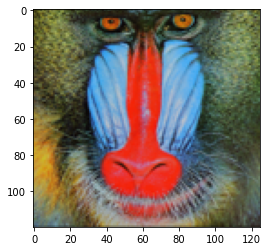

In [104]:
im,x =get_demo_image()

plt.imshow(im)

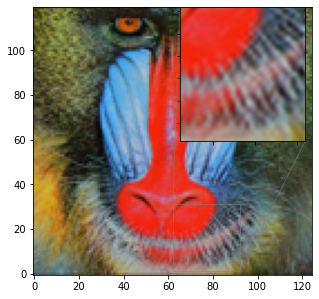

In [175]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage


def get_demo_image():
    import numpy as np
    z = imageio.imread('images/baboon-lowRes.png')
    z = np.flipud(z)
    # z is a numpy array of 15x15
    return z, (0, 100, 0, 100)

fig, ax = plt.subplots(figsize=[5, 5])

# make data
Z, extent = get_demo_image()

ax.imshow(Z,origin="lower")

# inset axes....
axins = ax.inset_axes([0.5, 0.5, 0.5, 0.5])


axins.imshow(Z, interpolation="lanczos",origin="lower")

# sub region of the original image
x1, x2, y1, y2 = 62, 92,1,31
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins)

plt.show()

In [154]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np

def zoom_in_rec(input, ax,rect, cmap):
    axins = zoomed_inset_axes(ax, 2, loc=3)  # zoom-factor: 2.5, location: upper-left
    x1, x2, y1, y2 = rect.get_x(), rect.get_x()+rect.get_width(),rect.get_y(), rect.get_y()+rect.get_height() # specify the limits
    axins.set_xlim(x1, x2)  # apply the x-limits
    axins.set_ylim(y1, y2)  # apply the y-limits
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="1.0")
    plt.yticks(visible=False)
    plt.xticks(visible=False)
    # flip image
    rot = np.flipud(input)
    axins.imshow(rot, cmap=cmap)

if __name__ == "__main__":
    img = mpimg.imread('images/baboon-lowRes.png')
    #Plot
    fig = plt.figure(figsize=(128,128))
    fig.patch.set_facecolor('white')
    gs1 = gridspec.GridSpec(1,1)
    gs1.update(wspace=0.02, hspace=0.02)  # set the spacing between axes.
    ax1 = plt.subplot(gs1[0])
    ax1.imshow(img,cmap='gray')
    rect1 = patches.Rectangle((200, 200), 120, 80, linewidth=3, edgecolor='r', facecolor='none')
    zoom_in_rec(img, ax1,rect1, cmap='gray')
    plt.show()

In [155]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.image as mpimg
import matplotlib.patches as patches

def zoom_in_rec(input, ax,rect, cmap):
    axins = zoomed_inset_axes(ax, 2, loc=3)  
    x1, x2, y1, y2 = rect.get_x(), rect.get_x()+rect.get_width(),rect.get_y(), rect.get_y()+rect.get_height() # specify the limits
    axins.set_xlim(x1, x2)  # apply the x-limits
    axins.set_ylim(y1, y2)  # apply the y-limits
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="1.0")
    plt.yticks(visible=False)
    plt.xticks(visible=False)
    axins.imshow(input, cmap=cmap)

if __name__ == "__main__":
    img = mpimg.imread('images/baboon-lowRes.png')
    #Plot
    fig = plt.figure(figsize=(128,128))
    fig.patch.set_facecolor('white')
    gs1 = gridspec.GridSpec(1,1)
    gs1.update(wspace=0.02, hspace=0.02)  # set the spacing between axes.
    ax1 = plt.subplot(gs1[0])
    ax1.imshow(img,cmap='gray')
    rect1 = patches.Rectangle((200, 200), 120, 80, linewidth=3, edgecolor='r', facecolor='none')
    zoom_in_rec(img, ax1,rect1, cmap='gray')
    plt.show()